In [1]:
import pandas as pd
import numpy as np

In [5]:
# Define the FEMFET device parameters
Ps = 1.0  # micro-cm^2
Pr_Ps = 0.8
Ec = 100 #kV/cm
d1 = 300 #Armstong
epi_1 = 3.9
d2 = 1000
epi_2 = 10 
d3 = 10
epi_3 = 3.9
Na = 3*10^16
mu = 0.08
W = 8
L = 4
phi_ms = -1.15
Vd = 0.1
Vs = 0
Vb = 0

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Constants
epsilon_0 = 8.854e-12  # Farad per meter
epsilon_s = 11.9  # Relative permittivity of silicon
q = 1.6e-19  # Elementary charge (C)
beta = 1 / (8.6173e-5 * 300)  # 1/(kT), where T is temperature in Kelvin

# Given parameters
d1 = 1e-6
d2 = 3e-6
d3 = 8e-6
epsilon_1 = 3.9
epsilon_2 = 11.9
epsilon_3 = 3.9
N_a = 1e16  # Assuming substrate doping concentration in cm^-3
L_B = np.sqrt(epsilon_0 * epsilon_s / (beta * q * N_a))

# Function to calculate silicon charge (sigma_s)
def silicon_charge(phi_s):
    term1 = np.sign(phi_s) * np.sqrt(2 * (epsilon_0 * epsilon_s) / (beta * L_B)) * (
            np.exp(-beta * phi_s) + beta * phi_s - 1)
    term2 = (N_a / N_a) ** 2 * (np.exp(beta * phi_s) - beta * phi_s - 1)
    return np.sqrt(term1 + term2)

# Function to calculate quasi-Fermi potential (phi_Fn)
def quasi_fermi_potential(phi_s, sigma_s):
    a = np.sqrt(2 * (epsilon_0 * epsilon_s) / (L_B))
    term1 = -beta * phi_F + np.log((-beta * sigma_s / (a * C_stack)) ** 2 - beta * phi_s * np.exp(beta * phi_s) - 1)
    return term1

# Function to calculate current (I)
def calculate_current(V_gb, V_bs, V_ds, phi_F):
    phi_s0_func = lambda phi_s0: V_bs + 2 * phi_F + 1 / beta * np.log(
        1 / a ** 2 * (beta * V_sb + beta * d2 * epsilon_0 * epsilon_2 * P_d(E_2) - beta * phi_s0) ** 2)
    phi_sL_func = lambda phi_sL: V_ds + V_bs + 2 * phi_F + 1 / beta * np.log(
        1 / a ** 2 * (beta * V_gb + beta * d2 * epsilon_0 * epsilon_2 * P_d(E_2) - beta * phi_sL) ** 2 - beta * phi_sL)
    phi_s0 = fsolve(phi_s0_func, 0)[0]
    phi_sL = fsolve(phi_sL_func, 0)[0]

    delta_10 = phi_F + V_bs + 2 * phi_F + 1 / beta * np.log(
        1 / a ** 2 * (beta * V_sb + beta * d2 * epsilon_0 * epsilon_2 * P_d(E_2) - beta * phi_s0) ** 2)
    phi_sL = V_ds + V_bs + 2 * phi_F + 1 / beta * np.log(
        1 / a ** 2 * (beta * V_gb + beta * d2 * epsilon_0 * epsilon_2 * P_d(E_2) - beta * phi_sL) ** 2 - beta * phi_sL)

    I = -overline_W * L * mu * C_stack * beta ** 2 * (
            (1 + beta * V_eb + beta * d2 * epsilon_0 * epsilon_2 * P_d(E_2)) * (
                    beta * phi_sL - beta * phi_s0) - 1 / 2 * (
                    (beta * phi_sL) ** 2 - (beta * phi_s0) ** 2) - 2 / 3 * a * (
                    (beta * phi_sL) ** 1.5 - (beta * phi_s0) ** 1.5) + a * (
                    (beta * phi_sL) ** 0.5 - (beta * phi_s0) ** 0.5))

    return I

# Given values for V_gb, V_bs, V_ds, and phi_F
V_gb_values = np.linspace(-2, 2, 100)
V_bs = 0.2
V_ds = 0.5
phi_F = 0.1

# Placeholder functions for P_d(E_2) and C_stack (you need to define these based on your actual equations)
def P_d(E_2):
    pass

def C_stack():
    pass

# Calculate current for each V_gb value
current_values = [calculate_current(V_gb, V_bs, V_ds, phi_F) for V_gb in V_gb_values]

# Plotting
plt.plot(V_gb_values, current_values, label='Current vs. $V_{gb}$')
plt.xlabel('$V_{gb}$ (V)')
plt.ylabel('Current (A)')
plt.legend()
plt.show()


NameError: name 'a' is not defined

In [8]:
# Given parameters (continued)
N_a = 1.0e16  # Replace with your actual value
L_B = np.sqrt(epsilon_0 * epsilon_2 / (beta * q * N_a))
overline_W = 1.0  # Replace with your actual value
L = 1.0e-6  # Replace with your actual value
mu = 1.0e-4  # Replace with your actual value
C_stack = 1.0e-3  # Replace with your actual value
beta = 1 / (8.6173e-5 * 300)  # 1/(kT), where T is temperature in Kelvin

# Calculate 'a'
a = np.sqrt(2 * (epsilon_0 * epsilon_2) / (L_B * C_stack))


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Given parameters
epsilon_0 = 8.85e-12  # Farad per meter
epsilon_1 = 3.9
epsilon_2 = 11.9
epsilon_3 = 3.9
d1 = 1.0e-6
d2 = 3.0e-6
d3 = 8.0e-6
N_a = 1.0e16  # Replace with your actual value
L_B = np.sqrt(epsilon_0 * epsilon_2 / (beta * q * N_a))
overline_W = 1.0  # Replace with your actual value
L = 1.0e-6  # Replace with your actual value
mu = 1.0e-4  # Replace with your actual value
C_stack = 1.0e-3  # Replace with your actual value
beta = 1 / (8.6173e-5 * 300)  # 1/(kT), where T is temperature in Kelvin

# Function to calculate silicon charge (sigma_s)
def silicon_charge(phi_s):
    term1 = np.sign(phi_s) * np.sqrt(2 * (epsilon_0 * epsilon_2) / (beta * L_B)) * (
            np.exp(-beta * phi_s) + beta * phi_s - 1)
    term2 = (N_a / N_a) ** 2 * (np.exp(beta * phi_s) - beta * phi_s - 1)
    return term1 + term2

# Function to calculate quasi-Fermi potential (phi_Fn)
def quasi_fermi_potential(phi_s, sigma_s):
    a = np.sqrt(2 * (epsilon_0 * epsilon_2) / (L_B * C_stack))
    term1 = -beta * phi_F + np.log(
        (-beta * sigma_s / (a * C_stack)) ** 2 - beta * phi_s * np.exp(beta * phi_s) - 1)
    return term1

# Function to calculate current (I)
def calculate_current(V_gb, V_bs, V_ds, phi_F):
    phi_s_func = lambda phi_s: V_bs + 2 * phi_F + 1 / beta * np.log(
        1 / a ** 2 * (beta * V_gb + beta * d2 * epsilon_0 * epsilon_2 * P_d(E_2) - beta * phi_s) ** 2 - beta * phi_s)
    phi_s = fsolve(phi_s_func, 0)[0]
    
    sigma_s = silicon_charge(phi_s)
    phi_Fn = quasi_fermi_potential(phi_s, sigma_s)

    I = -overline_W * L * mu * C_stack * beta ** 2 * (
            (1 + beta * V_eb + beta * d2 * epsilon_0 * epsilon_2 * P_d(E_2)) * (
                    beta * phi_sL - beta * phi_s0) - 1 / 2 * (
                    (beta * phi_sL) ** 2 - (beta * phi_s0) ** 2) - 2 / 3 * a * (
                    (beta * phi_sL) ** 1.5 - (beta * phi_s0) ** 1.5) + a * (
                    (beta * phi_sL) ** 0.5 - (beta * phi_s0) ** 0.5))

    return I

# Given values for V_gb, V_bs, V_ds, and phi_F
V_gb_values = np.linspace(-2, 2, 100)
V_bs = 0.2
V_ds = 0.5
phi_F = 0.1

# Placeholder functions for P_d(E_2) and C_stack (you need to define these based on your actual equations)
def P_d(E_2):
    pass

def C_stack():
    pass

# Calculate current for each V_gb value
current_values = [calculate_current(V_gb, V_bs, V_ds, phi_F) for V_gb in V_gb_values]

# Plotting
plt.plot(V_gb_values, current_values, label='Current vs. $V_{gb}$')
plt.xlabel('$V_{gb}$ (V)')
plt.ylabel('Current (A)')
plt.legend()
plt.show()


NameError: name 'E_2' is not defined

In [11]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Given parameters
epsilon_0 = 8.854e-12  # F/m
epsilon_2 = 3.9
d1 = 0.08e-6  # m
d2 = 8e-9  # m
d3 = 4e-9  # m
N_a = 1.0e16  # m^-3
L_B = np.sqrt(epsilon_0 * epsilon_2 / (beta * q * N_a))
overline_W = 1.0  # Replace with your actual value
L = 1.0e-6  # m, Replace with your actual value
mu = 1.0e-4  # m^2/(V s), Replace with your actual value
C_stack = 1.0e-3  # F/m^2, Replace with your actual value
beta = 1 / (8.6173e-5 * 300)  # 1/(kT), where T is temperature in Kelvin

# Calculate 'a'
a = np.sqrt(2 * (epsilon_0 * epsilon_2) / (L_B * C_stack))

# Function to calculate current (I)
def calculate_current(V_gb, V_bs, V_ds, phi_F):
    phi_s_func = lambda phi_s: V_bs + 2 * phi_F + 1 / beta * np.log(
        1 / a ** 2 * (beta * V_gb + beta * d2 * epsilon_0 * epsilon_2 * P_d(E_2) - beta * phi_s) ** 2 - beta * phi_s)
    phi_s = fsolve(phi_s_func, 0)[0]

    sigma_s = silicon_charge(phi_s)
    phi_Fn = quasi_fermi_potential(phi_s, sigma_s)

    E_2 = (-sigma_s - P_d(E_2)) / (epsilon_0 * epsilon_2)
    I = -overline_W * L * mu * C_stack * beta ** 2 * (
            (1 + beta * V_eb + beta * d2 * epsilon_0 * epsilon_2 * P_d(E_2)) * (
                    beta * phi_sL - beta * phi_s0) - 1 / 2 * (
                    (beta * phi_sL) ** 2 - (beta * phi_s0) ** 2) - 2 / 3 * a * (
                    (beta * phi_sL) ** 1.5 - (beta * phi_s0) ** 1.5) + a * (
                    (beta * phi_sL) ** 0.5 - (beta * phi_s0) ** 0.5))

    return I


# Example usage
V_gb_values = np.linspace(-1, 1, 100)
V_bs = 0.1  # Replace with your actual value
V_ds = 0.2  # Replace with your actual value
phi_F = 0.3  # Replace with your actual value

# Calculate current for each V_gb value
current_values = [calculate_current(V_gb, V_bs, V_ds, phi_F) for V_gb in V_gb_values]

# Plotting
plt.plot(V_gb_values, current_values, label='Current vs. $V_{gb}$')
plt.xlabel('$V_{gb}$ (Volts)')
plt.ylabel('Current (Amps)')
plt.title('Current vs. $V_{gb}$')
plt.legend()
plt.show()


NameError: cannot access free variable 'E_2' where it is not associated with a value in enclosing scope

C:\Users\Ishanya\AppData\Local\Temp\ipykernel_37032\4066029630.py:65: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2 * epsilon_si * epsilon_0 * (EOT - psi_s) * (EOT - psi_s - V))
C:\Users\Ishanya\AppData\Local\Temp\ipykernel_37032\4066029630.py:93: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


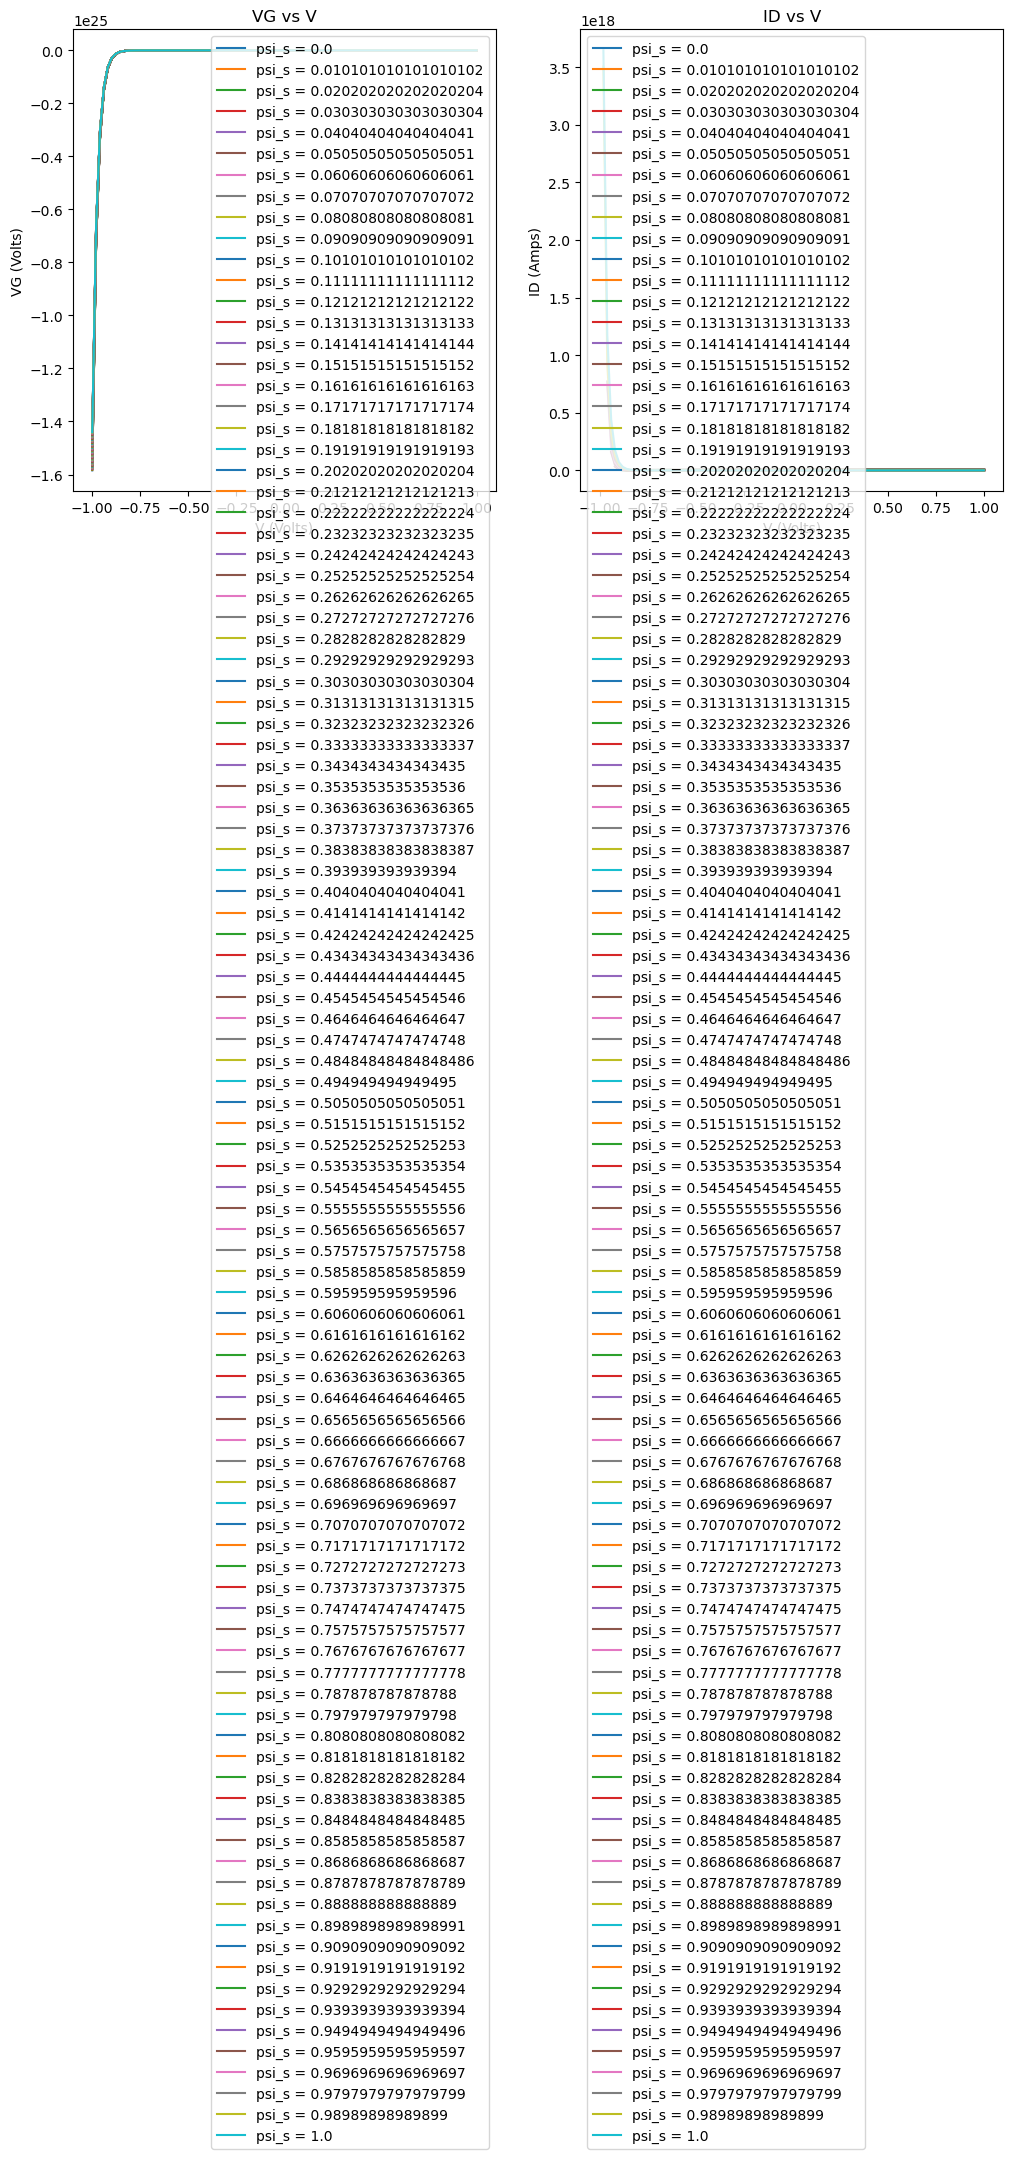

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Constants and parameters (replace with your actual values)
epsilon_0 = 8.854e-12  # F/m
epsilon_si = 11.9
q = 1.602e-19  # C
kT = 0.0259  # Thermal voltage at room temperature (25°C)
E_c = 1.0  # Energy level
delta = E_c * np.log((1 + 0.1) / (1 - 0.1))**-1  # Replace 0.1 with your Pr / Ps ratio
epsilon_F_value = 0.1  # Replace with your actual value
E_m_value = 0.2  # Replace with your actual value

# Equations
def tanh_plus(E, E_c, delta):
    return np.tanh((E - E_c) / (2 * delta))

def tanh_minus(E, E_c, delta):
    return -tanh_plus(-E, E_c, delta)

def P_plus(E, E_c, epsilon_F):
    return q * tanh_plus(E, E_c, delta) + epsilon_F * epsilon_0 * E

def P_minus(E, E_c, delta):
    return -P_plus(-E, E_c, delta)

def P_combined(E, E_c, epsilon_F, E_m):
    return P_plus(E, E_c, epsilon_F) + 0.5 * (P_plus(E_m + E_c, E_c, delta) - P_plus(E_m - E_c, E_c, delta))

def P_combined_minus(E, E_c, epsilon_F, E_m):
    return -P_combined(-E, E_c, epsilon_F, E_m)

def P_d(E_m, epsilon_F):
    return epsilon_F * epsilon_0 * E_m + 0.5 * (q * tanh_plus(E_m + E_c, E_c, delta) + q * tanh_plus(E_m - E_c, E_c, delta))

def Q_s(psi_s, V, E_m):
    first_term = np.sqrt(2) * epsilon_si * epsilon_0 * kT / (q * E_c)
    second_term = tanh_minus(psi_s, E_c, delta) + (np.exp(-beta * V) * (tanh_plus(psi_s, E_c, delta) - beta * psi_s * np.exp(beta * V) - 1))
    return first_term * second_term

def integrand(psi, V, E_m):
    return (ni**2 / Na) * np.exp(beta * (psi - V))

def ID(V, psi_s, E_m):
    integrand_result, _ = quad(integrand, psi_B, psi_s, args=(V, E_m))
    return q * mu * W / L * integrand_result / xi(psi_s, V)

def VG(psi_s, V, E_m):
    return psi_s + Q_s(psi_s, V, E_m) / (epsilon_si * epsilon_0 / EOT) + E_F * t_F

# Parameters for ID calculation
ni = 1e10  # Example value, intrinsic carrier concentration
Na = 1e16  # Example value, acceptor concentration
mu = 1.0e-4  # Example value, electron mobility
W = 1e-6  # Example value, width of the semiconductor
L = 1e-6  # Example value, length of the semiconductor
psi_B = 0.1  # Example value, built-in potential
E_F = 0.3  # Example value, Fermi level
EOT = 1e-9  # Example value, gate oxide thickness
t_F = 1e-6  # Example value, thickness of the semiconductor film

# Function for xi
def xi(psi_s, V):
    return np.sqrt(2 * epsilon_si * epsilon_0 * (EOT - psi_s) * (EOT - psi_s - V))

# Parameters for VG calculation
V_values = np.linspace(-1, 1, 100)
psi_s_values = np.linspace(0, 1, 100)

# Calculate VG for each psi_s value
VG_values = np.array([[VG(psi_s, V, E_m_value) for V in V_values] for psi_s in psi_s_values])

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(V_values, VG_values.T)
plt.xlabel('V (Volts)')
plt.ylabel('VG (Volts)')
plt.title('VG vs V')
plt.legend([f'psi_s = {psi_s}' for psi_s in psi_s_values])

# Calculate and plot ID vs VG
ID_values = np.array([[ID(V, psi_s, E_m_value) for V in V_values] for psi_s in psi_s_values])

plt.subplot(1, 2, 2)
plt.plot(V_values, ID_values.T)
plt.xlabel('V (Volts)')
plt.ylabel('ID (Amps)')
plt.title('ID vs V')
plt.legend([f'psi_s = {psi_s}' for psi_s in psi_s_values])

plt.tight_layout()
plt.show()
